In [1]:
import rasterio as rio

In [2]:
import os

In [3]:
import earthpy as et

In [20]:
import earthpy.plot as ep

In [21]:
from rasterio.plot import plotting_extent
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

In [24]:
import seaborn as sns

In [40]:
from matplotlib import pyplot

In [50]:
from rasterio.plot import show

In [29]:
# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [111]:
with rio.open('planet\\20191015_131014_100a\\20191015_131014_100a.tif') as image:
    print(image.tags(ns='IMAGE_STRUCTURE'))
    image_mask = image.dataset_mask()
    # get bounds for plotting
    bounds = plotting_extent(image)
    band_blue = image.read(1)
    band_gren = image.read(2)
    band_red = image.read(3)
    band_nir = image.read(4)

{'COMPRESSION': 'LZW', 'INTERLEAVE': 'PIXEL'}


In [112]:
band_blue[image.height // 2, image.width // 2]

5122

In [113]:
image.bounds

BoundingBox(left=672411.0, bottom=8145267.0, right=699216.0, top=8158551.0)

In [85]:
# View generate metadata associated with the raster file
image.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 8935,
 'height': 4428,
 'count': 4,
 'crs': CRS.from_epsg(32722),
 'transform': Affine(3.0, 0.0, 672411.0,
        0.0, -3.0, 8158551.0)}

In [86]:
# What is the spatial resolution?
image.res

(3.0, 3.0)

In [87]:
# View data mask
image_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [88]:
print(image.crs)
print(image.bounds)

EPSG:32722
BoundingBox(left=672411.0, bottom=8145267.0, right=699216.0, top=8158551.0)


In [90]:
# Get crs of a rasterio object
image.crs.data['init']

'epsg:32722'

In [65]:
et.epsg['32613']

'+proj=utm +zone=13 +datum=WGS84 +units=m +no_defs'

In [91]:
print(image.count)

4


In [92]:
# How many bands / layers does the object have?
print("number of bands", image.indexes)

number of bands (1, 2, 3, 4)


In [95]:
image

<closed DatasetReader name='planet\20191015_131014_100a\20191015_131014_100a.tif' mode='r'>

In [106]:
image.transform

Affine(3.0, 0.0, 672411.0,
       0.0, -3.0, 8158551.0)

In [107]:
image.crs

CRS.from_epsg(32722)

In [108]:
image.indexes

(1, 2, 3, 4)

In [ ]:
band1[dataset.height // 2, dataset.width // 2]

In [102]:
# Open data and assign negative values to nan
with rio.open('planet\\20191015_131014_100a\\20191015_131014_100a.tif') as src:
    lidar_dem_im = src.read(1, masked=True)

In [103]:
# View object dimensions
lidar_dem_im.shape

(4428, 8935)

In [104]:
# The .ravel method turns an 2-D numpy array into a 1-D vector
print(lidar_dem_im.shape)
print(lidar_dem_im.ravel().shape)

(4428, 8935)
(39564180,)


(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2380dda6198>)

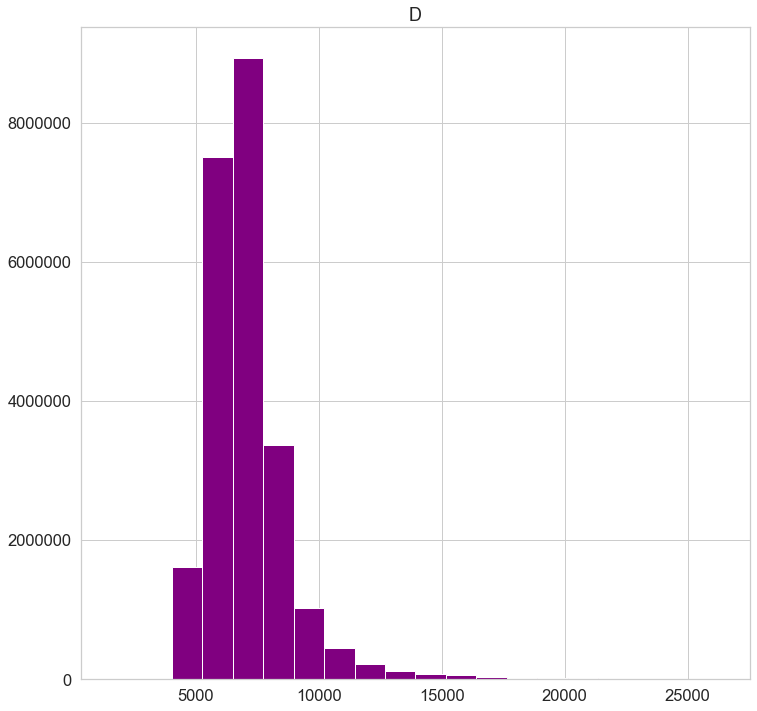

In [105]:
ep.hist(lidar_dem_im, colors=['purple'],
        title="Distribution of Lidar DEM Elevation Values")

In [100]:
src = rio.open('planet\\20191015_131014_100a\\20191015_131014_100a.tif')

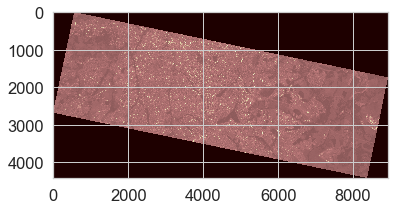

In [101]:
pyplot.imshow(src.read(1), cmap='pink')

In [77]:
src.bounds

BoundingBox(left=672411.0, bottom=8145267.0, right=699216.0, top=8158551.0)

In [78]:
src.count

4

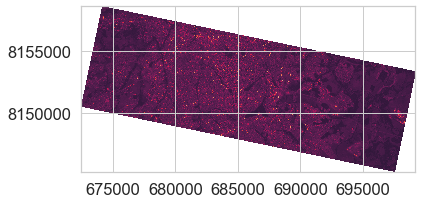

In [79]:
show(src)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


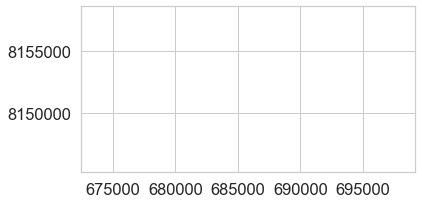

In [80]:
show(src.read(), transform=src.transform)

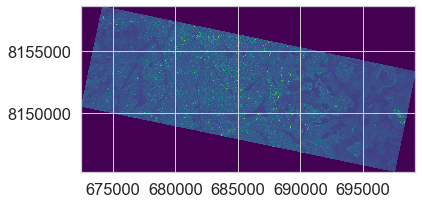

In [81]:
show((src, 1), cmap='viridis')

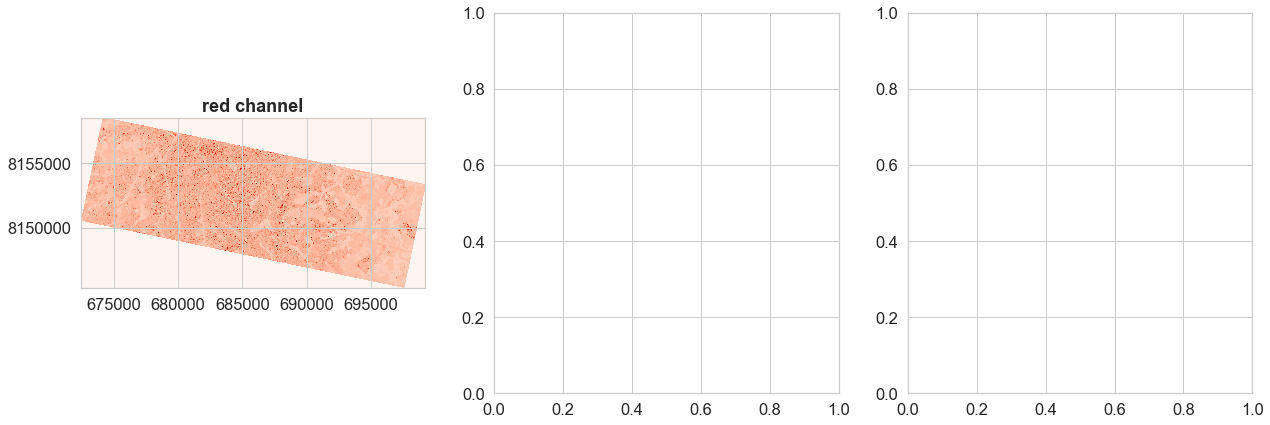

In [82]:
fig, (axr, axg, axb) = pyplot.subplots(1,3, figsize=(21,7))
show((src, 1), ax=axr, cmap='Reds', title='red channel')

In [83]:
show((src, 2), ax=axg, cmap='Greens', title='green channel')